# Spatial Operations in Image Processing (Filtering & Sharpening)

Spatial operations use pixels in a neighborhood to determine the present pixel value. Applications include filtering and sharpening. They are used in many steps in computer vision like segmentation and are a key building block in Artificial Intelligence algorithms.

Table of Contents:
- [Linear Filtering](#Linear-Filtering)
- [Filtering Noise](#Filtering-Noise)  
- [Gaussian Blur](#Gaussian-Blur)  
- [Image Sharpening](#Image-Sharpening)  
- [Edges](#Edges)
- [Median](#Median)

### import library

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [ ]:
# two process :
  # filter(kernal: it just an array):
      # Tupe of filter:
            # Linear Filter(called convolution filter) ----> z(output image) = w(kernal) . x(input image) ... itall called an array

In [3]:
lenna_image = cv2.imread("lenna.png")
print(lenna_image )

[[[125 137 226]
  [125 137 226]
  [133 137 223]
  ...
  [122 148 230]
  [110 130 221]
  [ 90  99 200]]

 [[125 137 226]
  [125 137 226]
  [133 137 223]
  ...
  [122 148 230]
  [110 130 221]
  [ 90  99 200]]

 [[125 137 226]
  [125 137 226]
  [133 137 223]
  ...
  [122 148 230]
  [110 130 221]
  [ 90  99 200]]

 ...

 [[ 60  18  84]
  [ 60  18  84]
  [ 58  27  92]
  ...
  [ 84  73 173]
  [ 76  68 172]
  [ 79  62 177]]

 [[ 57  22  82]
  [ 57  22  82]
  [ 62  32  96]
  ...
  [ 79  70 179]
  [ 81  71 181]
  [ 81  74 185]]

 [[ 57  22  82]
  [ 57  22  82]
  [ 62  32  96]
  ...
  [ 79  70 179]
  [ 81  71 181]
  [ 81  74 185]]]


(np.float64(-0.5), np.float64(511.5), np.float64(511.5), np.float64(-0.5))

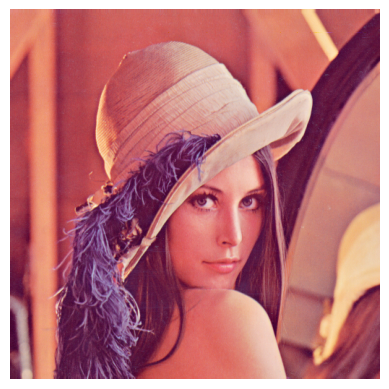

In [5]:
plt.imshow(cv2.cvtColor(lenna_image, cv2.COLOR_BGR2RGB))
plt.axis("off")

In [6]:
# This function will plot two images
def plot_image(image_1, image_2,title_1,title_2):
    plt.figure(figsize=(10,10))
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(image_1, cv2.COLOR_BGR2RGB))
    plt.title(title_1)
    plt.subplot(1, 2, 2)
    plt.imshow(cv2.cvtColor(image_2, cv2.COLOR_BGR2RGB))
    plt.title(title_2)
    plt.show()

## Linear Filtering

Filtering involves enhancing an image, for example removing the Noise from an image. Noise is caused by a bad camera or bad image compression. The same factors that cause noise may lead to blurry images, we can apply filters to sharpening these images. Convolution is a standard way to Filter an image the filter is called the kernel and different kernels perform different tasks. In addition, Convolution is used for many of the most advanced artificial intelligence algorithms. We simply take the dot product of the kernel and as an equally-sized portion of the image. 

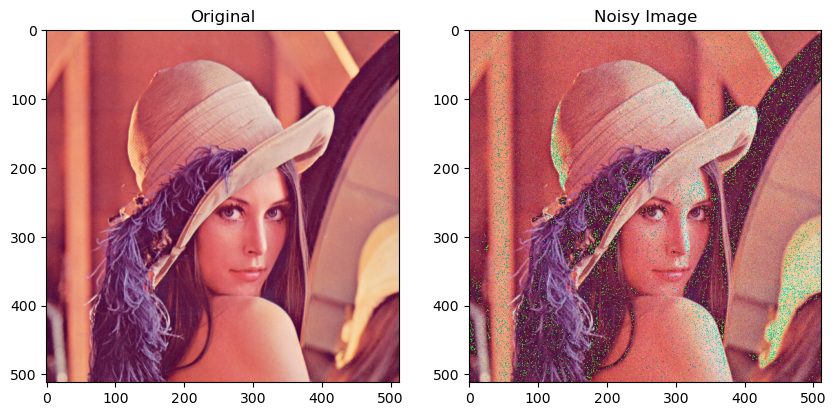

In [9]:
rows , cols, _ = lenna_image.shape

#creates noise to the image with normal distribution of mean of 0 and standard diviation of 15
noise = np.random.normal(0, 15, (rows, cols, 3)).astype(np.uint8)

#add the noise to thw image
image_noise = lenna_image + noise

#plot the two images(original and noise
plot_image(lenna_image, image_noise, "Original", "Noisy Image")

## Filtering Noise

Smoothing filters average out the Pixels within a neighborhood, they are sometimes called low pass filters. For mean filtering, the  kernel simply averages out the kernels in a neighborhood.

In [12]:
kernel = np.ones((6, 6)) / 36

In [13]:
#Using Mean or averge filter
image_filtered = cv2.filter2D(src = image_noise, ddepth = -1, kernel = kernel)

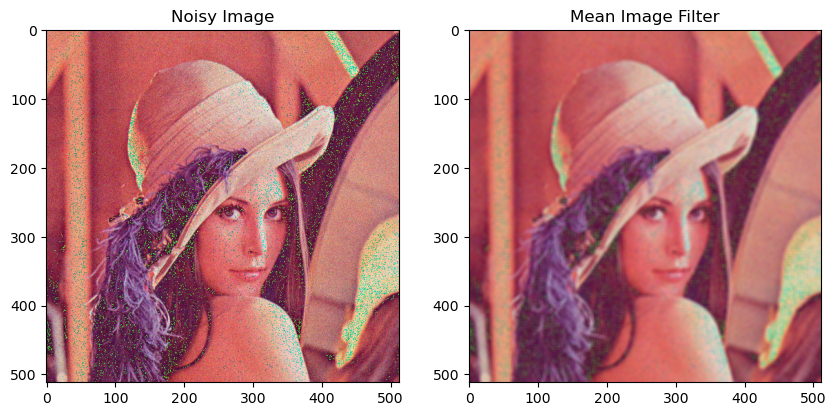

In [15]:
plot_image(image_noise, image_filtered, "Noisy Image", "Mean Image Filter")

The function filter2D performs 2D convolution between the image src and the kernel on each color channel independently. The parameter ddepth has to do with the size of the output image, we will set it to -1 so the input and output are the same size.

## Guassion Blur:
The function  <code>GaussianBlur</code> convolves the source image with the specified Gaussian kernel It filters noise but does a better job of preserving the edges. It has the following parameters:


Parameters

<p><code>src</code> input image; the image can have any number of channels, which are processed independently</p>
<p><code>ksize:</code> Gaussian kernel size</p>
<p><code>sigmaX</code> Gaussian kernel standard deviation in the X direction</p>
<p><code>sigmaY</code> Gaussian kernel standard deviation in the Y direction; if sigmaY is zero, it is set to be equal to sigmaX </p>


In [ ]:
# Guassion distribution 2D: IF IN THE MOUNTEN THE HIGHER PIONT THE MIDDEL VALUE IN THE IMAGE 

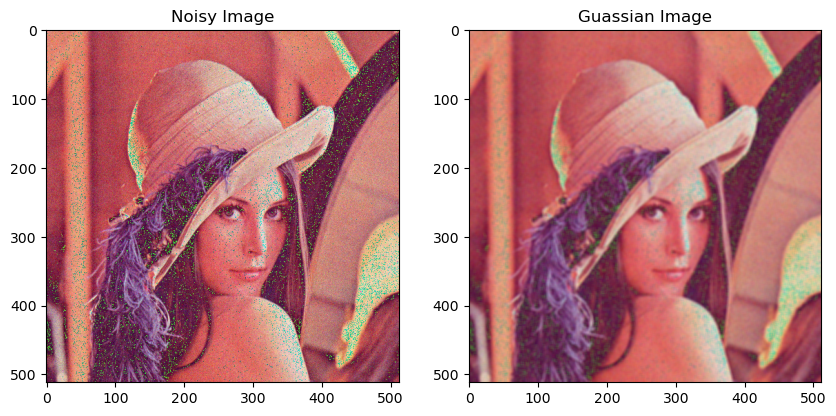

In [20]:
guassian_blur_image = cv2.GaussianBlur(image_noise, (5,5), sigmaX = 4, sigmaY = 4)
plot_image(image_noise, guassian_blur_image, "Noisy Image", "Guassian Image")

## Image Sharpining:

Image Sharpening  involves smoothing the image and calculating the derivatives.  We can accomplish image sharpening by applying the following Kernel.

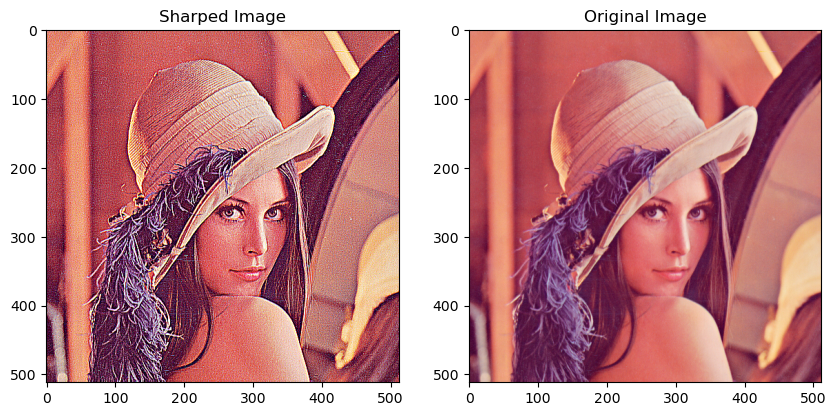

In [30]:
kernel = np.array([[-1, -1,-1], # this value is always fixed 
                   [-1, 9, -1],
                   [-1, -1, -1]])
shaped_image = cv2.filter2D(lenna_image, -1, kernel)
plot_image(shaped_image, lenna_image, "Sharped Image", "Original Image")

## Edge Detection:

Edges are where pixel intensities change. The Gradient of a function outputs the rate of change; we can approximate the gradient of a grayscale image with convolution. There are several methods to approximate the gradient, let’s use the Sobel edge detector. This combines several convolutions and finding the magnitude of the result.

#### We can approximate the derivative in the X or Y direction  using the <code>Sobel</code> function, here are the parameters:

<p><code>src</code>: input image</p>
<p><code>ddepth</code>: output image depth, see combinations; in the case of 8-bit input images it will result in truncated derivatives</p>
<p><code>dx</code>: order of the derivative x</p>
<p><code>dx</code>: order of the derivative y</p>
<p><code>ksize</code> size of the extended Sobel kernel; it must be 1, 3, 5, or 7</p>

dx = 1 represents the derivative in the x-direction.  The function approximates  the derivative by  convolving   the image with the following kernel  

\begin{bmatrix} 
1 & 0 & -1 \\\\\\\\
2 & 0 & -2 \\\\
1 & 0 & -1 
\end{bmatrix}


In [42]:
#Initialize the parameters
ddepth = cv2.CV_16S  # Corrected constant name (uppercase CV_16S)

channels = cv2.split(lenna_image)
sobel_x_channels = []  # Fixed variable name spelling

#apply sobel in X direction for each channel
for ch in channels:
    grad_x = cv2.Sobel(ch, ddepth, dx=1, dy=0, ksize=3)  # Fixed function name Sobel, ksize: kernel siz
    abs_grad_x = cv2.convertScaleAbs(grad_x)  # Fixed function name convertScaleAbs
    sobel_x_channels.append(abs_grad_x)  # Using abs_grad_x instead of grad_x for better visualization

#merge channels to form an RGB sobel image
sobel_x_rgb = cv2.merge(sobel_x_channels)  # Fixed variable name spelling

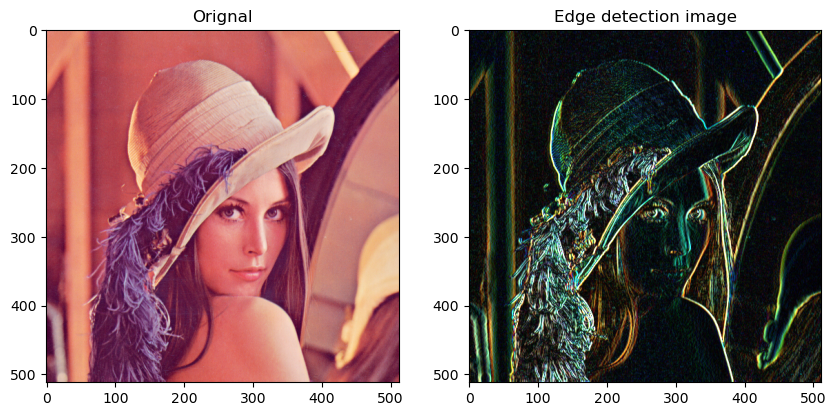

In [43]:
plot_image(lenna_image, sobel_x_rgb, "Orignal", "Edge detection image")

## Median:

Median filters find the median of all the pixels under the kernel area and the central element is replaced with this median value. 


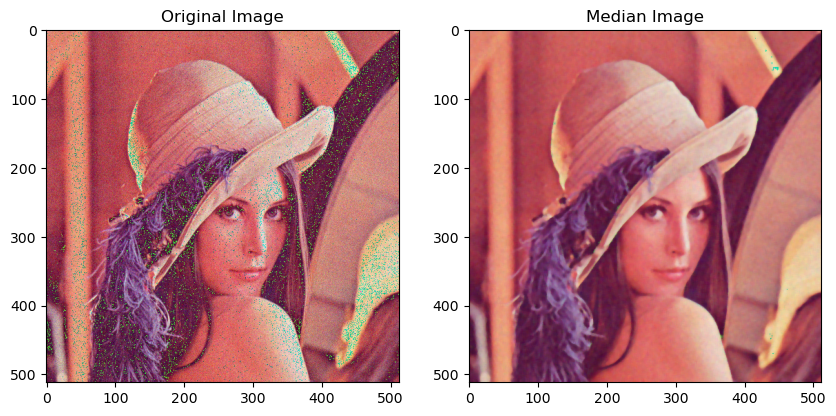

In [41]:
# when its do filter its will take the median of value of the image and the median value of the kernel
# then its will multiply the values togather from both of the image and the kernel:
median_filtered_image = cv2.medianBlur(image_noise, 5)
plot_image(image_noise, median_filtered_image, "Original Image", "Median Image")

In [ ]:
# what the problem of the somthing :
# the sum value of the kernal value its should be equal to one(1)